In [6]:
%matplotlib inline
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pics = io.loadmat('Photos.mat')
i1 = pics['I1']
i2 = pics['I2']
i3 = pics['I3']
i4 = pics['I4']
i = np.array([i1,i2,i3,i4])

v1 = np.array([0.085832, 0.17365, 0.98106])
v2 = np.array([0.085832, -0.17365, 0.98106])
v3 = np.array([0.17365, 0, 0.98481])
v4 = np.array([0.16318, -0.34202, 0.92542])

# v1 = np.array([0.085832, 0.17365, 0.98106]) * 128
# v2 = np.array([0.085832, -0.17365, 0.98106]) * 128
# v3 = np.array([0.17365, 0, 0.98481]) *128
# v4 = np.array([0.16318, -0.34202, 0.92542]) * 128
v = np.array([v1,v2,v3,v4])
print(v)

[[ 0.085832  0.17365   0.98106 ]
 [ 0.085832 -0.17365   0.98106 ]
 [ 0.17365   0.        0.98481 ]
 [ 0.16318  -0.34202   0.92542 ]]


In [8]:
# print(i[:,0,0])
# g = np.dot(np.linalg.inv(np.dot(v.T,v)) , np.dot(v.T, i[:,0,0]))
# print(g)

print(i.shape)

# calc g
g = np.empty([3,128,128])

for y in range(128):
    for x in range(128):
        g[:,y,x] = np.dot(np.linalg.inv(np.dot(v.T,v)) , np.dot(v.T, i[:,y,x]))
print(g.shape)

# calc n
n = np.copy(g)
for y in range(128):
    for x in range(128):
        if (n[:,y,x] > 0).all() == True:
            norm = np.linalg.norm(n[:,y,x])
            n[:,y,x] = n[:,y,x]/norm

print(n.shape)

(4, 128, 128)
(3, 128, 128)
(3, 128, 128)


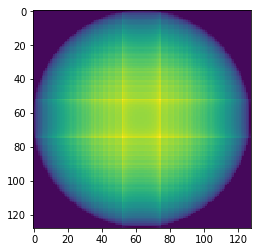

In [9]:
nx = n[0,:,:]
ny = n[1,:,:]
nz = n[2,:,:]

fx = np.copy(nx)
fy = np.copy(ny)

for y in range(128):
    for x in range(128):
        if nz[y,x] != 0:
            fx[y,x] = -nx[y,x]/nz[y,x]
            fy[y,x] = -ny[y,x]/nz[y,x]

f = np.copy(nz)
for y in range(128):
    for x in range(128):
        f[y,x] = np.sum(fx[y,0:x]) + np.sum(fy[0:y,x])


# print(f)
plt.imshow(f)

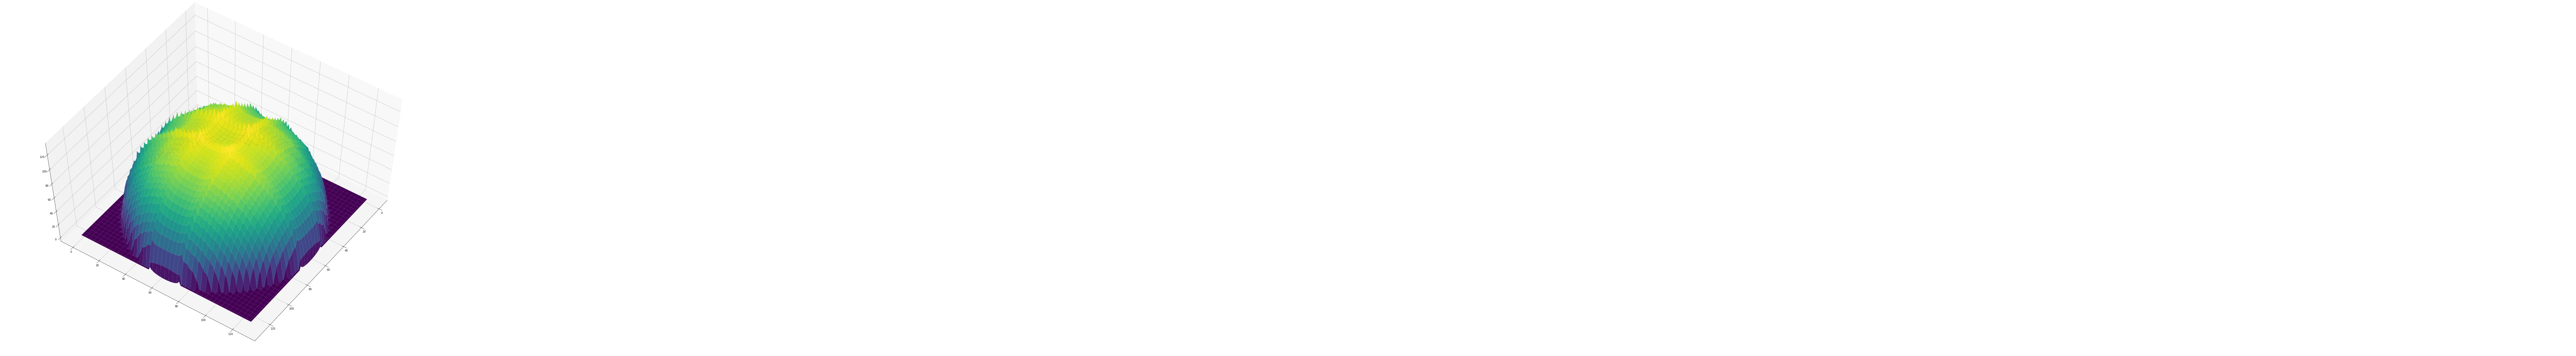

In [20]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30, 25))
ax = plt.axes(projection='3d')

# # Data for three-dimensional scattered points
# xdata = list(range(128))
# ydata = list(range(128))
# zdata = list(range(128))
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

# Data for three-dimensional scattered points
xdata = list(range(128))
ydata = list(range(128))
X, Y = np.meshgrid(xdata, ydata)
ax.plot_surface(X, Y, f, cmap='viridis')
ax.view_init(60, 35)